In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.distributions.empirical_distribution import ECDF

# Данные
data = np.array([
    8.001071e-01, 5.041889e-01, 2.664685e-01, -4.770844e-02, 3.513464e-01, -4.602651e-02,
    6.057982e-01, 7.216688e-01, -1.487822e-01, 6.416075e-01, 7.737807e-01, 8.656691e-01,
    8.243314e-02, -1.292534e-01, 1.013098e-01, 3.437524e-01, 4.953853e-01, 6.791949e-01,
    -2.379079e-01, 4.661002e-01, 1.391302e-01, -4.985341e-01, 2.748161e-01, 9.335072e-01,
    -3.169073e-01, 5.486775e-01, 4.711449e-01, 5.334881e-01, 1.013037e-01, 1.060072e+00,
    4.985338e-02, -9.416369e-02, -3.905072e-01, -4.686987e-01, 4.898790e-01, 5.787903e-01,
    3.455846e-01, 5.638065e-01, 9.111474e-01, -5.036490e-01, -4.793516e-02, 5.700437e-01,
    5.591450e-01, -1.369904e-01, 9.854279e-01, 2.553315e-01, 8.183111e-01, 4.133144e-03,
    7.941797e-01, 7.735315e-01, 5.055396e-01, 7.107581e-01, 5.431871e-01, 4.067514e-01,
    2.164089e-01, 6.462302e-01, 1.253630e-01, 1.126965e+00, 2.770344e-02, 5.794975e-01,
    -1.276101e-02, 1.518974e-01, 8.037583e-01, -9.865360e-03, 1.059284e+00, -1.541398e-01,
    9.095530e-01, 4.070955e-01, 5.936508e-01, -7.653095e-02, -1.342779e-01, -1.441597e-01,
    2.011890e-01, 5.249362e-01, 1.452671e+00, 6.256253e-01, -9.377040e-02, 1.361002e-01,
    -1.790680e-01, 1.383312e+00, 4.137691e-01, 7.926766e-01, 7.000853e-01, 3.643432e-01,
    2.714335e-01, 4.717087e-01, -2.594533e-01, 7.104975e-01, 9.285831e-01, 2.911290e-02,
    -5.333143e-01, 9.054848e-01, 2.783779e-01, -2.079178e-01, 8.534109e-02, 7.821136e-01,
    3.944874e-01, 6.163706e-01, 2.851566e-01, 7.384123e-01, -2.013879e-02, 4.278272e-01,
    6.504972e-01, 3.337796e-01, -1.132320e-02, 6.690908e-01, 1.521827e-01, 5.279396e-01,
    7.987527e-01, 5.479212e-01, 4.901062e-01, 1.960046e-01, 6.458789e-01, 5.276495e-01,
    6.235328e-01, -1.317905e-01, -2.260285e-02, 8.458327e-01, 1.174040e+00, 2.445658e-01
])

# Основные выборочные характеристики
n = len(data)
sample_mean = np.mean(data)
sample_var = np.var(data)
sample_unbiased_var = np.var(data, ddof=1)
sample_range = np.ptp(data)
sample_median = np.median(data)

print(f"Выборочное среднее: {sample_mean}")
print(f"Выборочная дисперсия: {sample_var}")
print(f"Несмещённая выборочная дисперсия: {sample_unbiased_var}")
print(f"Размах: {sample_range}")
print(f"Медиана: {sample_median}")

Выборочное среднее: 0.37635808444999996
Выборочная дисперсия: 0.17193796291278562
Несмещённая выборочная дисперсия: 0.1733828197439855
Размах: 1.9859853
Медиана: 0.42079815


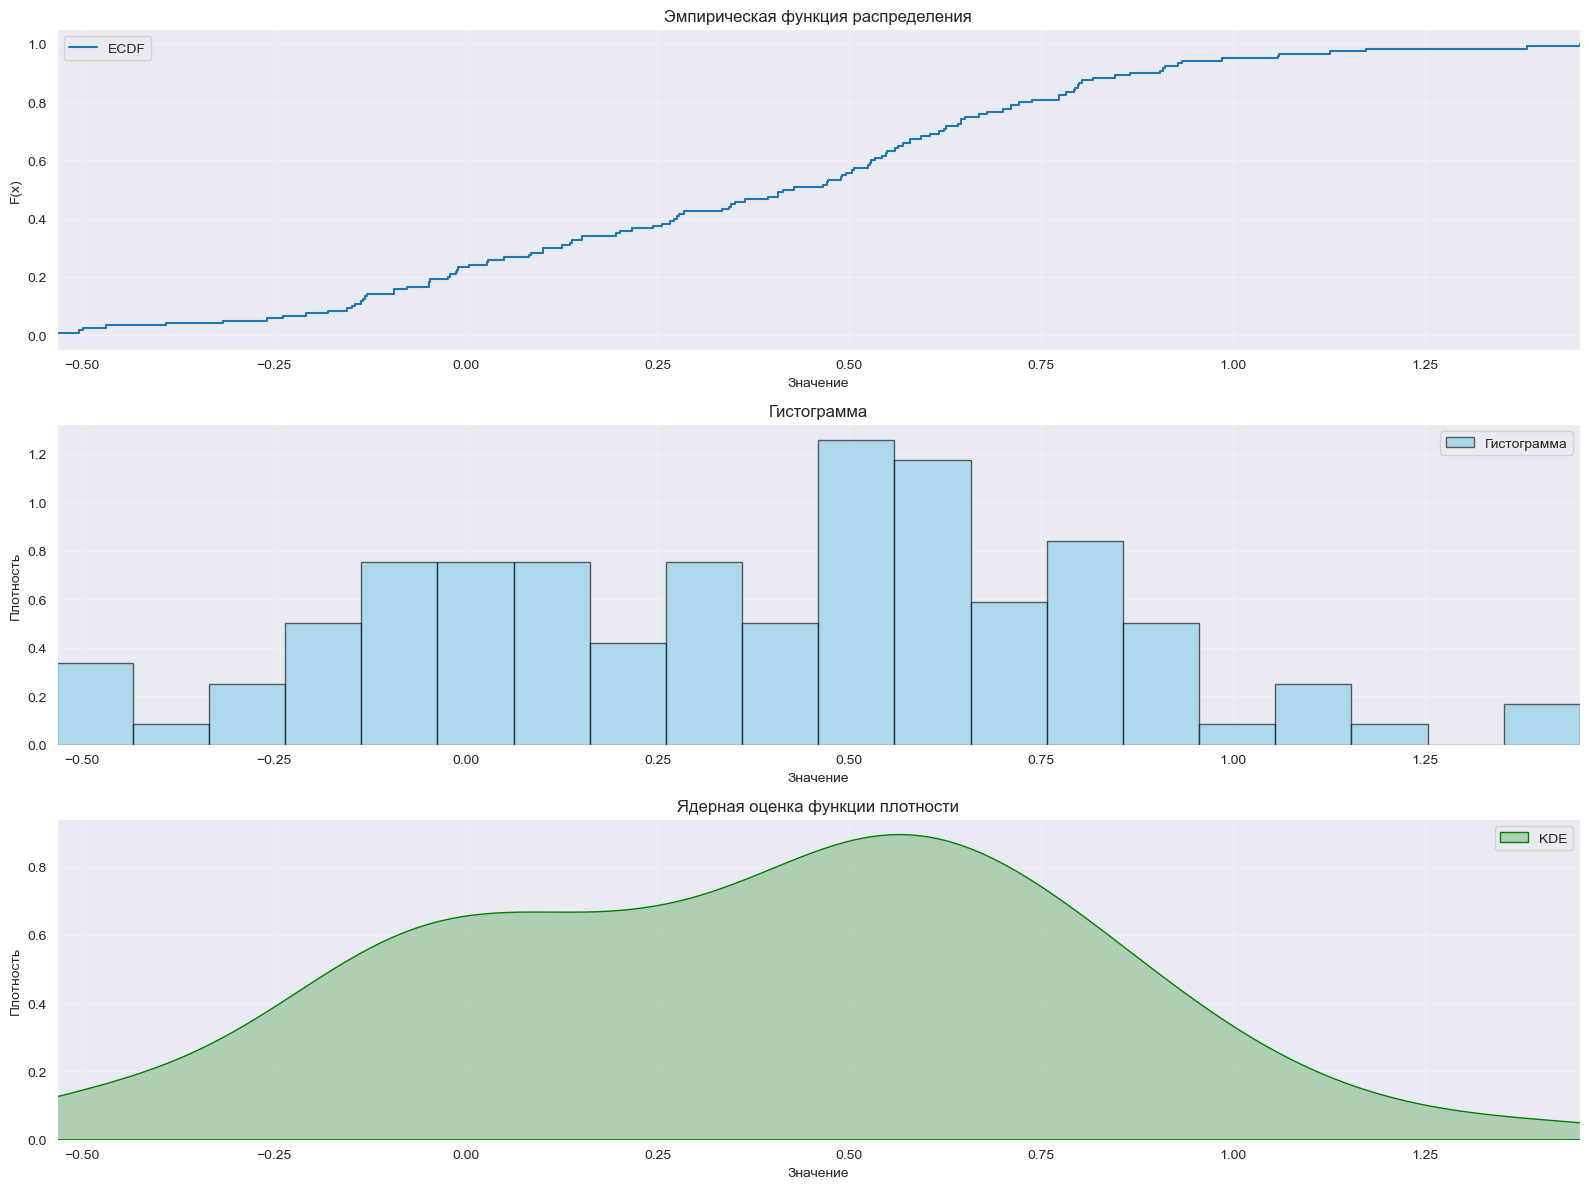

In [5]:
ecdf = ECDF(data)
x = np.linspace(min(data), max(data), num=500)
# Установка общих пределов по X
x_min, x_max = min(data), max(data)

plt.figure(figsize=(16, 12))

plt.subplot(3, 1, 1)
plt.step(ecdf.x, ecdf.y, where="post", label='ECDF')
plt.title("Эмпирическая функция распределения")
plt.xlabel("Значение")
plt.ylabel("F(x)")
plt.grid(True, which='both', alpha=0.3)
plt.xlim(x_min, x_max)
plt.legend()

plt.subplot(3, 1, 2)
plt.hist(data, bins=20, density=True, alpha=0.6, color='skyblue', 
         edgecolor='black', label='Гистограмма')
plt.title("Гистограмма")
plt.xlabel("Значение")
plt.ylabel("Плотность")
plt.grid(True, which='both', alpha=0.3)
plt.xlim(x_min, x_max)
plt.legend()

plt.subplot(3, 1, 3)
sns.kdeplot(data, bw_method='scott', fill=True, color='green', label='KDE')
plt.title("Ядерная оценка функции плотности")
plt.xlabel("Значение")
plt.ylabel("Плотность")
plt.grid(True, which='both', alpha=0.3)
plt.xlim(x_min, x_max)
plt.legend()

plt.tight_layout()
plt.show()

In [7]:
std = np.std(data, ddof=1)  # выборочное стандартное отклонение
var = std**2

alpha = 0.01  # для 99% доверительного интервала

# Интервал для среднего
t_crit = stats.t.ppf(1 - alpha/2, df=n-1)
mean_ci = (sample_mean - t_crit * std / np.sqrt(n), sample_mean + t_crit * std / np.sqrt(n))

# Интервал для дисперсии
chi2_lower = stats.chi2.ppf(alpha/2, df=n-1)
chi2_upper = stats.chi2.ppf(1 - alpha/2, df=n-1)
var_ci = ((n-1)*var/chi2_upper, (n-1)*var/chi2_lower)

print(f"99% доверительный интервал для математического ожидания: "f"[{mean_ci[0]}, {mean_ci[1]}]")

print(f"99% доверительный интервал для дисперсии: "f"[{var_ci[0]}, {var_ci[1]}]")

99% доверительный интервал для математического ожидания: [0.2768530886657597, 0.47586308023424023]
99% доверительный интервал для дисперсии: [0.12698403872443714, 0.24853064545291814]


Критерий Колмогорова:
Статистика D = 0.0687
Критическое значение = 0.1240
Вывод: Не отвергаем H0


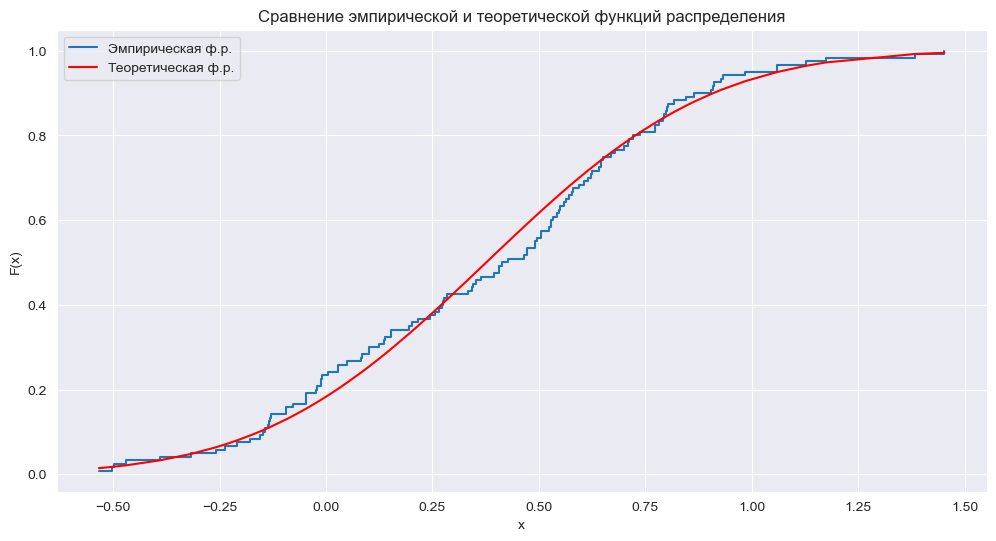

In [8]:
# Проверка гипотезы о нормальном распределении

# Параметры предполагаемого нормального распределения
mu = sample_mean
sigma = np.sqrt(sample_unbiased_var)

# 1. Критерий Колмогорова
# Рассчитываем теоретическую функцию распределения
x_sorted = np.sort(data)
theoretical_cdf = stats.norm.cdf(x_sorted, mu, sigma)
empirical_cdf = np.arange(1, len(data) + 1) / len(data)

# Статистика Колмогорова
D = np.max(np.abs(theoretical_cdf - empirical_cdf))
n = len(data)
# Критическое значение для уровня значимости 0.05
critical_value = np.sqrt(-np.log(0.05/2)/(2*n))

print("Критерий Колмогорова:")
print(f"Статистика D = {D:.4f}")
print(f"Критическое значение = {critical_value:.4f}")
print(f"Вывод: {'Отвергаем H0' if D > critical_value else 'Не отвергаем H0'}")

# Визуализация для критерия Колмогорова
plt.figure(figsize=(12, 6))
plt.step(x_sorted, empirical_cdf, label='Эмпирическая ф.р.', where='post')
plt.plot(x_sorted, theoretical_cdf, 'r-', label='Теоретическая ф.р.')
plt.title('Сравнение эмпирической и теоретической функций распределения')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.grid(True)
plt.legend()
plt.show()



Критерий хи-квадрат Пирсона:
Число интервалов: 8
Статистика хи-квадрат = 9.3606
Критическое значение = 11.0705
Степени свободы = 5
Вывод: Не отвергаем H0


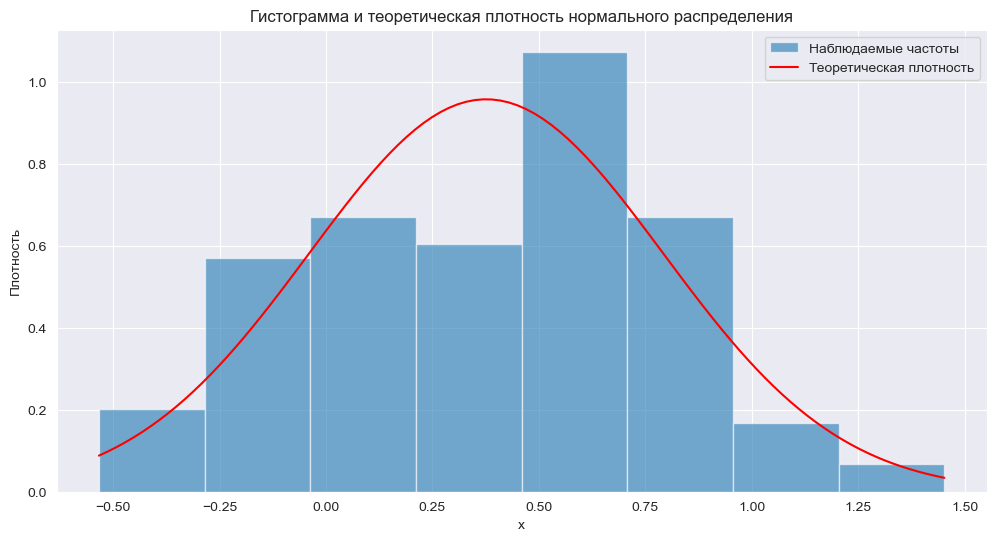

In [9]:
# 2. Критерий хи-квадрат Пирсона

# Определяем интервалы для гистограммы
k = int(np.ceil(1 + 3.322 * np.log10(n)))  # Формула Стёрджеса для числа интервалов
intervals = np.linspace(min(data), max(data), k+1)

# Наблюдаемые частоты
observed, _ = np.histogram(data, bins=intervals)

# Ожидаемые частоты
expected = np.zeros(k)
for i in range(k):
    expected[i] = n * (stats.norm.cdf(intervals[i+1], mu, sigma) - 
                      stats.norm.cdf(intervals[i], mu, sigma))

# Статистика хи-квадрат
chi_square = np.sum((observed - expected) ** 2 / expected)

# Степени свободы (k-1-2, где 2 - число оцененных параметров)
df = k - 1 - 2

# Критическое значение для уровня значимости 0.05
chi_critical = stats.chi2.ppf(0.95, df)

print("\nКритерий хи-квадрат Пирсона:")
print(f"Число интервалов: {k}")
print(f"Статистика хи-квадрат = {chi_square:.4f}")
print(f"Критическое значение = {chi_critical:.4f}")
print(f"Степени свободы = {df}")
print(f"Вывод: {'Отвергаем H0' if chi_square > chi_critical else 'Не отвергаем H0'}")

# Визуализация для критерия хи-квадрат
plt.figure(figsize=(12, 6))
plt.hist(data, bins=intervals, density=True, alpha=0.6, label='Наблюдаемые частоты')
x = np.linspace(min(data), max(data), 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), 'r-', label='Теоретическая плотность')
plt.title('Гистограмма и теоретическая плотность нормального распределения')
plt.xlabel('x')
plt.ylabel('Плотность')
plt.grid(True)
plt.legend()
plt.show()